In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/fods_assignment/Placement_Data_Full_Class.csv")

In [ ]:
print(df.head())
df.shape


   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


(215, 15)

In [ ]:
df1=df.drop(columns =['hsc_b','ssc_b','hsc_s','degree_t','workex','specialisation','gender'])

In [ ]:
df1.shape


(215, 8)

In [ ]:
df1.isna().sum()

sl_no        0
ssc_p        0
hsc_p        0
degree_p     0
etest_p      0
mba_p        0
status       0
salary      67
dtype: int64

In [ ]:
x=df1.values[:,0:6]
y=df1.values[:,6]




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_train_pred=clf.predict(x_train)
print(" training Accuracy:",metrics.accuracy_score(y_train,y_train_pred))
print(" testing Accuracy:",metrics.accuracy_score(y_test,y_pred))

clf1=DecisionTreeClassifier()
print("cross validation accuracy",cross_val_score(clf1,x_train,y_train,cv=10,scoring='accuracy').mean())


 training Accuracy: 1.0
 testing Accuracy: 0.8153846153846154
cross validation accuracy 0.7466666666666666


[Text(0.4772727272727273, 0.9444444444444444, 'X[1] <= 62.5\ngini = 0.42\nsamples = 150\nvalue = [45, 105]'),
 Text(0.18181818181818182, 0.8333333333333334, 'X[2] <= 59.5\ngini = 0.4\nsamples = 47\nvalue = [34, 13]'),
 Text(0.13636363636363635, 0.7222222222222222, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.22727272727272727, 0.7222222222222222, 'X[1] <= 56.44\ngini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.13636363636363635, 0.6111111111111112, 'X[5] <= 56.975\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.09090909090909091, 0.5, 'X[4] <= 78.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.045454545454545456, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.13636363636363635, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.18181818181818182, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.3181818181818182, 0.6111111111111112, 'X[5] <= 52.295\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.2

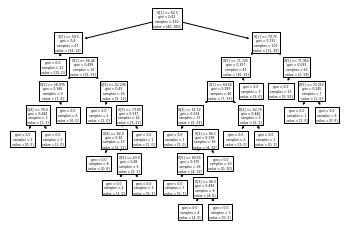

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz

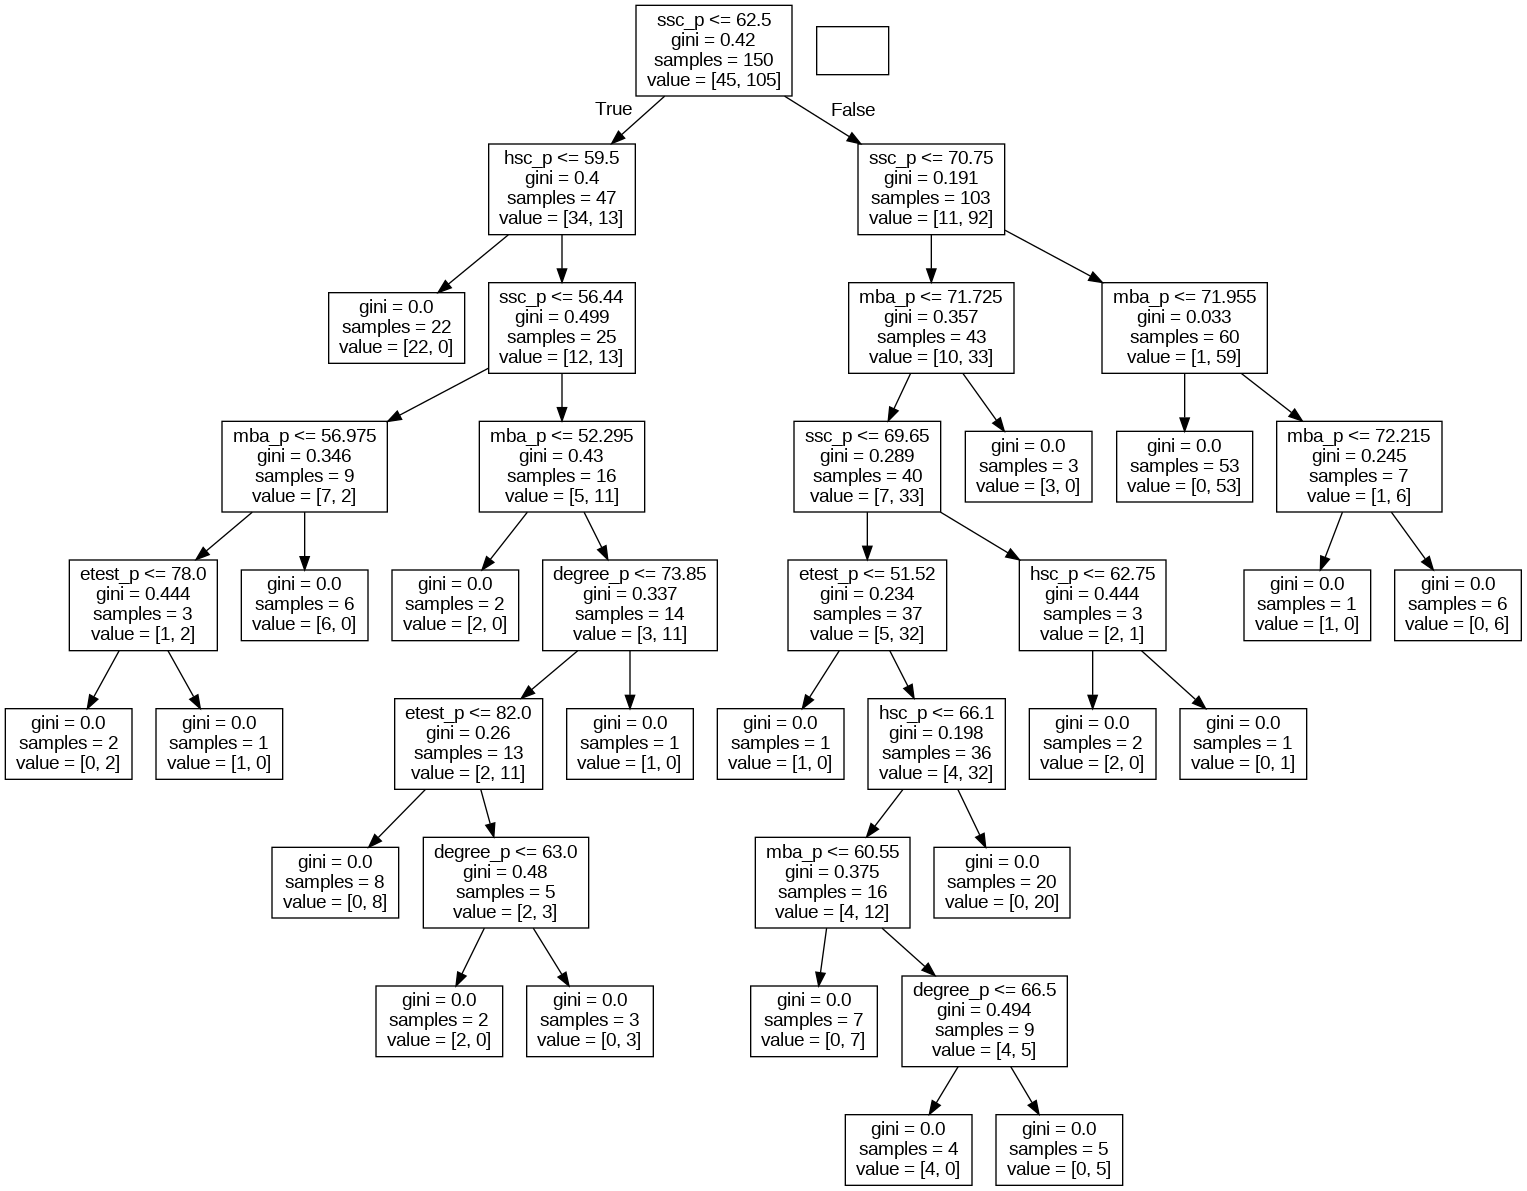

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
feature_col=['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
dot_data=StringIO()
data1=export_graphviz(clf,out_file=None,feature_names=feature_col)
graph=pydotplus.graph_from_dot_data(data1)
graph.write_png('placement.png')
Image(graph.create_png())

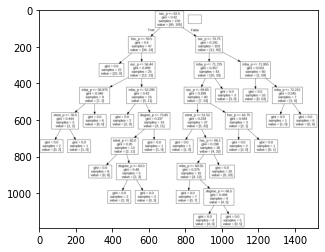

In [ ]:
import matplotlib.image as pltimg
data=tree.export_graphviz(clf,out_file=None,feature_names=feature_col)
graph=pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')
img=pltimg.imread('mydecisiontree.png')
imgplot=plt.imshow(img)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
clf=GaussianNB()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_train_pred=clf.predict(x_train)
print(" training Accuracy:",metrics.accuracy_score(y_train,y_train_pred))
print(" testing Accuracy:",metrics.accuracy_score(y_test,y_pred))

clf1=DecisionTreeClassifier()
print(cross_val_score(clf1,x_train,y_train,cv=10,scoring='accuracy').mean())


 training Accuracy: 0.8333333333333334
 testing Accuracy: 0.8153846153846154
0.8066666666666666


NAive bayes gives more accuracy
